# Import Packages

In [51]:
import pandas as pd
import csv
import os
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [52]:
# Download NLTK packages
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt"])

[nltk_data] Downloading package names to /Users/simon/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Packag

True

# 1. Load in data from "Interim" folder

In [105]:
# Get path to the repo directory
dir_path = "/".join(os.getcwd().split("/")[0:-1])

In [108]:
# Load in previously gathered reviews
reviews = pd.read_csv(open(dir_path + "/data/interim/reviews-cleaned.csv"))

In [109]:
# Preview file
reviews.head(1)

,Unnamed: 0,product_title,asin,author,review,rating,date,url
0,8,Yankee Candle Large Jar Candle Home Sweet Home,B000WUFVR0,Amazon Customer,The media could not be loaded. I apologize for...,1.0,2020-09-17,https://www.amazon.com/s?k=yankee+candles&crid...


# 2. Explore Data

<AxesSubplot:>

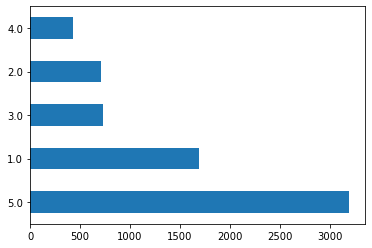

In [110]:
# View the distributions of ratings
reviews['rating'].value_counts().plot(kind='barh')

In [111]:
# View the distributions of dates
reviews['date'].value_counts()

2021-12-28    58
2021-12-23    38
2022-01-12    37
2020-10-21    35
2020-11-23    31
              ..
2020-07-01     1
2020-03-10     1
2020-03-13     1
2020-07-31     1
2020-04-26     1
Name: date, Length: 670, dtype: int64

# 3. Sentiment Analysis

In [112]:
# Create a sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Create an empty list to house sentiments
sentiment = []

In [113]:
# Iterate through each row of "reviews"
for index, row in reviews.iterrows():
    # Try to analyze the sentiment (if not na)
    try:
        # Analyze the review
        t = sentiment_analyzer.polarity_scores(row['review'])

        # Assign sentiment based on compound sentiment value
        # If it is positive, mark positive
        if t['compound'] > 0:
            sentiment.append("positive")
        # If it is negative, mark negative
        elif t['compound'] < 0:
            sentiment.append("negative")
        # Else, mark neutral
        else:
            sentiment.append("neutral")

    # Mark all failed attempts as "na"
    except:
        sentiment.append("na")

In [115]:
# Create new column in "reviews" that contains the sentiment of each review
reviews['sentiment'] = sentiment

In [128]:
# Preview data
reviews.head(1)

,Unnamed: 0,product_title,asin,author,review,rating,date,url,sentiment
0,8,Yankee Candle Large Jar Candle Home Sweet Home,B000WUFVR0,Amazon Customer,The media could not be loaded. I apologize for...,1.0,2020-09-17,https://www.amazon.com/s?k=yankee+candles&crid...,positive


<AxesSubplot:>

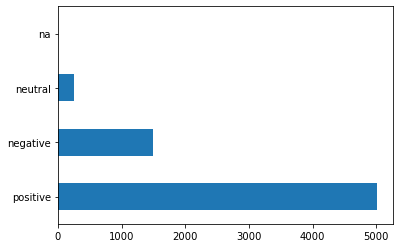

In [129]:
# View the distribution of sentiments
reviews['sentiment'].value_counts().plot(kind='barh')

## Output classified reviews

In [134]:
reviews.to_csv((dir_path + "/data/interim/reviews-classified.csv"), index = False)

# 4. Analyze sentiment data

## Collect all negative reviews

In [118]:
# Create a new dataframe containing all negative reviews whose rating is less than 3/5
negative_reviews = reviews[reviews['sentiment'] == "negative"]
negative_reviews = negative_reviews[negative_reviews['rating'] < 3.0]

<AxesSubplot:>

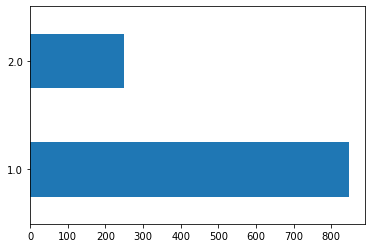

In [132]:
# Visualize rating distribution
negative_reviews['rating'].value_counts().plot(kind="barh")

## Subset by mention of smell

In [122]:
# Gather all negative reviews that mention smell, scent, or fragrance
negative_reviews_smell = negative_reviews.loc[negative_reviews['review'].str.contains('scent|smell|fragrance'),:]

In [133]:
# Sort the results by date
negative_reviews_smell = negative_reviews_smell.sort_values(by="date")

In [135]:
# Preview data
negative_reviews_smell

,Unnamed: 0,product_title,asin,author,review,rating,date,url,sentiment
2898,4096,Yankee Candle Large Jar Candle Bahama Breeze,B004G9DV66,Zombie Gil 007,"I used to love Yankee Candle, sadly not anymor...",2.0,2020-03-01,https://www.amazon.com/s?k=yankee+candles&crid...,negative
4245,6257,"Yankee Candle Large Jar Candle, Silver Birch",B00J6CH1VO,AnnaMarie,Complete waste of money! No smell whatsoever!!...,1.0,2020-03-06,https://www.amazon.com/s?k=yankee+candles&crid...,negative
6737,10136,Yankee Candle Large Jar Candle Sage & Citrus,B000RY54LO,cindy martin,Hate the scent,1.0,2020-03-07,https://www.amazon.com/s?k=yankee+candles&crid...,negative
4968,7324,Yankee Candle Large Jar Candle Café Al Fresco,B01NAAQLZ1,Rebecca Silberstein,First the wick was not centered so the burn wa...,1.0,2020-03-07,https://www.amazon.com/s?k=yankee+candles&crid...,negative
6534,9816,Yankee Candle Large Jar Candle French Vanilla,B000W3T9GG,Rebecca Silberstein,First the wick was not centered so the burn wa...,1.0,2020-03-07,https://www.amazon.com/s?k=yankee+candles&crid...,negative
...,...,...,...,...,...,...,...,...,...
5709,8437,"Yankee Candle Large Jar Candle, Autumn Wreath",B000TVJ6XW,Philly T.,This candle burned out constantly. I trimmed w...,1.0,2022-01-15,https://www.amazon.com/s?k=yankee+candles&crid...,negative
2348,3357,"Yankee Candle Large 2-Wick Tumbler Candle, Spi...",B004USM1A0,Philly T.,This candle burned out constantly. I trimmed w...,1.0,2022-01-15,https://www.amazon.com/s?k=yankee+candles&crid...,negative
3627,5131,"Yankee Candle Balsam & Cedar Scented Candles, ...",B002UE6YQ8,MJ,"I was sent an old expired candle, it was so ol...",1.0,2022-01-15,https://www.amazon.com/s?k=yankee+candles&crid...,negative
328,567,Yankee Candle Large Jar Candle Spiced Pumpkin,B000W3V8S8,Philly T.,This candle burned out constantly. I trimmed w...,1.0,2022-01-15,https://www.amazon.com/s?k=yankee+candles&crid...,negative


## Output negative reviews that mention smell

In [136]:
negative_reviews_smell.to_csv((dir_path + "/data/interim/negative-reviews-smell.csv"), index = False)